In [3]:

import matplotlib
from matplotlib import pyplot as plt
#from ren import renAlgo
import scipy
import scipy.signal
import numpy as np
import os
#from calibrate import focal2distance
import pickle
import cv2
from huHann import huHann
import copy

In [6]:
def neighbourReplace(src,size,thresh=49):
    csrc=copy.copy(src)
    Rf=scipy.ndimage.maximum_filter(src,size=size)
    csrc[np.where(csrc<=thresh)]= Rf[np.where(csrc<=thresh)]
    return src
#def outofStDFilt(src,sigma): # if pix is out of sigma of neighbours, then toss and replace with mean

In [7]:
def calibrate(x):
    return 0.004179093 - (-0.0001941383/-12.98214)*(1 - np.exp(12.98214*x))
def rcalibrate(y):
    return 0.0770289*np.log(66870.6 *(y - 0.00416414))

In [8]:
def renAlgo(files):
    confMaps=[]
    for index, filename in enumerate(files):
        print(filename)
        im = cv2.imread(filename)
        
        img=im[:,:,2].astype(int)
        blurmap=huHann(img)
#         plt.figure()
#         plt.imshow(blurmap,cmap="gray")
        nmap=(8-blurmap)/8
#         plt.figure()
#         plt.imshow(nmap,cmap="gray")
        blur = cv2.GaussianBlur(nmap,(99,99),0)
        blur = cv2.GaussianBlur(blur,(99,99),0) # second order
#         plt.figure()
#         plt.imshow(blur,cmap="gray")
        confMaps.append(blur)
    flatConf=np.array(confMaps)
    return flatConf
    

In [9]:
goodStuff=renAlgo(["86_0.jpg","86_1.jpg","86_2.jpg","86_3.jpg","86_4.jpg","86_5.jpg","86_6.jpg","86_7.jpg"])

86_0.jpg


/Users/dennisren/Documents/shit/FociMap/dev-archive/tuneRen/huHann.py:42: RuntimeWarning: divide by zero encountered in true_divide
  R=np.divide(R1,R2)
/Users/dennisren/Documents/shit/FociMap/dev-archive/tuneRen/huHann.py:42: RuntimeWarning: invalid value encountered in true_divide
  R=np.divide(R1,R2)


86_1.jpg
86_2.jpg
86_3.jpg
86_4.jpg
86_5.jpg
86_6.jpg
86_7.jpg


In [10]:

focal=[0.5, 0.6, .7, .75, .8, .85, .9, .95]

flatConf=goodStuff
semiFlatConf=goodStuff

In [11]:
calDistance=list(map(lambda x :calibrate(x)+0.05,[0.5, 0.6, .7, .75, .8, .85, .9, .95]))
calDistance=calDistance/max(calDistance)

In [13]:
calDistance

0.26979851766256546

In [19]:



flatConf=semiFlatConf.reshape(semiFlatConf.shape[0],-1)
print(flatConf.shape)
mean_lala=flatConf.mean(0)

print(mean_lala.shape)
#depth_1d=np.array(list(map(lambda x: calibrate(x),mean_lala)))
depth_1d=mean_lala
print(depth_1d.shape)
oneDepth=depth_1d.reshape(semiFlatConf.shape[1],semiFlatConf.shape[2])


(8, 12192768)
(12192768,)
(12192768,)


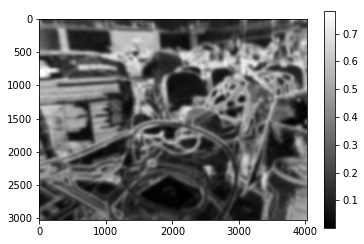

In [21]:
#%matplotlib
plt.imshow(oneDepth,cmap="gray",norm=matplotlib.colors.LogNorm())
plt.colorbar()

In [22]:
normalize=255*(oneDepth-min(focal))/(max(focal)-min(focal))

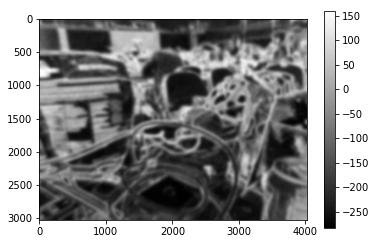

In [23]:
plt.imshow(normalize,cmap="gray")
plt.colorbar()

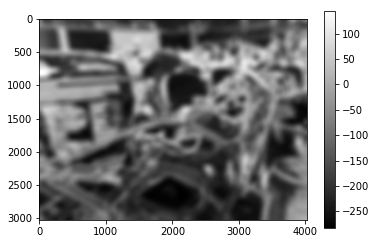

In [24]:
mu=  cv2.blur(normalize, (100,100))
plt.imshow(mu,cmap="gray")
plt.colorbar()

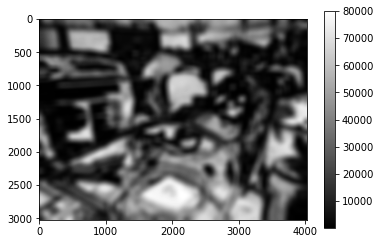

In [25]:
mu2= cv2.blur(np.multiply(normalize,normalize), (100,100));
plt.imshow(mu2,cmap="gray")
plt.colorbar()

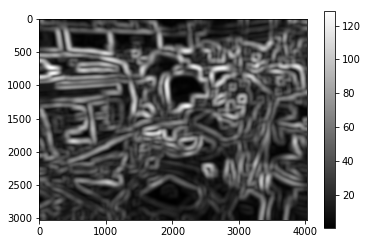

In [26]:

sigma=cv2.sqrt(np.abs(mu2 - np.multiply(mu,mu)))
plt.imshow(sigma,cmap="gray")
plt.colorbar()

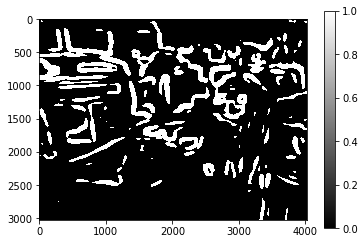

In [27]:
bisigma=copy.copy(sigma)
tresh=bisigma.max()*0.45
bisigma[np.where(bisigma>tresh)]= 120
bisigma[np.where(bisigma<=tresh)]= 0
plt.imshow(bisigma/120,cmap="gray")
plt.colorbar()

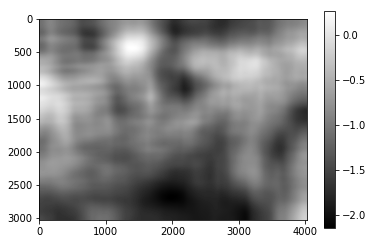

In [28]:
fatblur=cv2.blur(normalize, (500,500))
plt.imshow(fatblur/120,cmap="gray")
plt.colorbar()

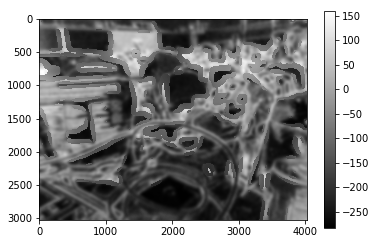

In [29]:
new_normalize=copy.copy(normalize)

new_normalize[np.where(bisigma>0.5)]= fatblur[np.where(bisigma>0.5)]
plt.imshow(new_normalize,cmap="gray")
plt.colorbar()

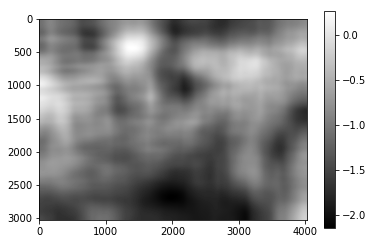

In [30]:
fatblur=cv2.blur(normalize, (500,500))
plt.imshow(fatblur/120,cmap="gray")
plt.colorbar()

In [31]:
list(map(lambda x :calibrate(x)+0.05,[0.5, 0.6, .7, .75, .8, .85, .9, .95]))

[0.064022411195946261,
 0.090272517823195564,
 0.18642007362367446,
 0.30727964878542513,
 0.53858445214128459,
 0.98126275862953016,
 1.8284742310770523,
 3.4498938229714948]